In [1]:
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
import pandas as pd
import seaborn as sns
import geopandas as gpd

In [3]:
import numpy as np
np.random.seed(12345789) # For reproducibility

import random 
random.seed(123456789) # For reproducibility

In [44]:
#Load data
df20 = pd.read_csv('GWR.csv')

In [45]:
print("Full data set shape is: " + ' by '.join(str(i) for i in df2020.shape))

Full data set shape is: 9015 by 20


In [46]:
df20.describe()

,Lat,Long,num_Dur,num_Old,num_Prd,num_Pro,dis_station,station_dis,dis_airport,air_dis,air_Lat,air_Lng,Price
count,8989.000000,9005.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9.015000e+03
mean,51.495482,-0.113971,1.570050,1.972823,1.249251,1.640433,9.543555,0.818636,24.161567,0.307266,51.460483,-0.309840,8.311038e+05
std,0.078079,0.154981,0.495096,0.162608,0.558377,1.347088,5.529302,0.385341,8.179560,0.461386,0.145934,0.302543,4.307384e+06
min,51.294791,-0.497875,1.000000,1.000000,1.000000,1.000000,0.070000,0.000000,1.419000,0.000000,51.153662,-0.454687,1.000000e+02
25%,51.438288,-0.210458,1.000000,2.000000,1.000000,1.000000,4.931000,1.000000,18.513500,0.000000,51.465495,-0.454687,3.750000e+05
50%,51.491290,-0.116086,2.000000,2.000000,1.000000,1.500000,8.930000,1.000000,25.343000,0.000000,51.465495,-0.454687,5.000000e+05
75%,51.557187,-0.011511,2.000000,2.000000,1.000000,1.500000,13.783500,1.000000,30.795500,1.000000,51.465495,-0.454687,7.250000e+05
max,51.681867,0.273996,2.000000,2.000000,2.500000,7.000000,25.261000,1.000000,39.934000,1.000000,51.885000,0.695000,2.962800e+08


Clean data

In [47]:
#delete the value with missing coordinate value and invalid value.
df20=df20.drop(df20[((df20.Lat.isna())|(df20.Long.isna()))].index, axis=0)
df20=df20.drop(df20[((df20.Lat < 40)|(df20.Long > 1))].index, axis=0)

In [48]:
#drop all rows that have any NaN values
df20=df20.dropna(axis=0,how='any') 
df20=df20.dropna(axis=0,how='all')  

In [89]:
df20['dis_station'] = df20['dis_station'].astype(int)

In [90]:
df20['dis_airport'] = df20['dis_airport'].astype(int)

In [91]:
df20.sample(5, random_state=50)

,Pcd,Lat,Long,Duration,num_Dur,Old_Or_New,num_Old,Prd_Category_Type,num_Prd,Property_Type,...,dis_station,station_dis,station_Lat,station_Lng,dis_airport,air_dis,air_Lat,air_Lng,Price,geometry
1979,E79BT,51.551245,0.017149,F,2,N,2,A,1.0,T,...,7,1,51.5178,-0.0801,34,0,51.465495,-0.454687,480000,POINT (0.01715 51.55125)
5690,SE266DN,51.425925,-0.057522,F,2,N,2,B,2.5,O,...,5,1,51.47,?-0.0942,27,0,51.465495,-0.454687,8250,POINT (-0.05752 51.42592)
3655,N32LJ,51.600774,-0.193994,L,1,N,2,B,2.5,O,...,7,1,51.5419359,-0.143849,23,0,51.465495,-0.454687,80000,POINT (-0.19399 51.60077)
2341,HA14JQ,51.582936,-0.348881,F,2,N,2,A,1.0,T,...,14,1,?51.5154,-0.175743,14,1,51.465495,-0.454687,635000,POINT (-0.34888 51.58294)
5400,SE193QT,51.418898,-0.097890,F,2,N,2,A,1.0,D,...,5,1,51.47,?-0.0942,25,0,51.465495,-0.454687,655000,POINT (-0.09789 51.41890)


<AxesSubplot:title={'center':'London'}, xlabel='Long', ylabel='Lat'>

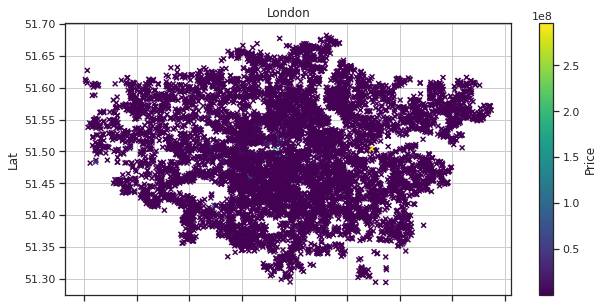

In [52]:
df20.plot.scatter(x='Long',y='Lat',
                c='Price',colormap='viridis',
                figsize=(10,5),title='London',
                grid=True,s=24,marker='x')

In [53]:
from math import floor, ceil

# Calculate min and max to two decimal points
xmin = floor(df20.Long.min()*100)/100
xmax = ceil(df20.Long.max()*100)/100
ymin = floor(df20.Lat.min()*100)/100
ymax = ceil(df20.Lat.max()*100)/100

print(xmin, xmax, ymin, ymax)

# Calculate the centre of the map
yctr = ymin+(ymax-ymin)/2
xctr = xmin+(xmax-xmin)/2

print(xctr, yctr)

-0.5 0.28 51.29 51.69
-0.10999999999999999 51.489999999999995


In [54]:
#Read Remote Geo-Data
spath = 'https://raw.githubusercontent.com/jreades/i2p/master/data/src/' # source path

boros = gpd.read_file(spath+'Boroughs.gpkg?raw=true')
msoas = gpd.read_file(spath+ 'Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip')

<AxesSubplot:>

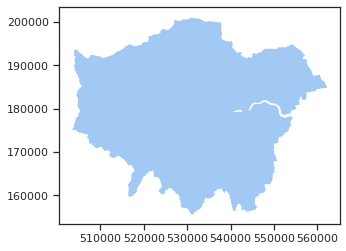

In [55]:
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})

# In order to ensure that we get all MSOAs _within_ London 
# we will buffer the boundary by 250m. If _cover_ were 
# easier to use then that option might be preferable.
ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')
ldn.plot()

<AxesSubplot:>

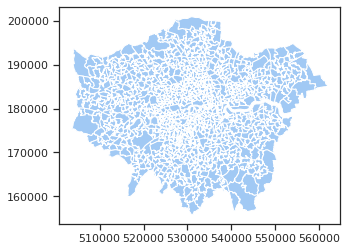

In [56]:
#Combine layers
ldn_msoas = gpd.sjoin(msoas, ldn, op='within');
ldn_msoas.plot()

In [57]:
# no longer really need to keep the full MSOA data set hanging about
del msoas

In [58]:
ldn_msoas['Borough'] = ldn_msoas.MSOA11NM.str.replace(r' \d+$','',regex=True)

# Just check results look plausible; you should have:
# - 33 boroughs
# - A df shape of 983 x 14
print(ldn_msoas.Borough.unique())
print(len(ldn_msoas.Borough.unique()))
print(ldn_msoas.shape)

['City of London' 'Barking and Dagenham' 'Barnet' 'Bexley' 'Brent'
 'Bromley' 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster']
33
(983, 14)


In [59]:
#Add MSOA Names
msoa_nms = pd.read_csv(spath+'MSOA-Names-1.8.csv.gz?raw=true', compression='gzip')

In [60]:
print(msoa_nms.columns.values)
msoa_nms.sample(3, random_state=42)

['msoa11cd' 'msoa11nm' 'msoa11nmw' 'msoa11hclnm' 'msoa11hclnmw' 'Laname']


,msoa11cd,msoa11nm,msoa11nmw,msoa11hclnm,msoa11hclnmw,Laname
4512,E02005951,Oxford 012,Oxford 012,Grandpont & New Hinksey,NaN,Oxford
4660,W02000113,Powys 017,Powys 017,Brecon,Aberhonddu,Powys
1038,W02000309,Caerphilly 020,Caerffili 020,Bedwas & Trethomas,Bedwas a Thretomas,Caerphilly


In [61]:
#loaded the `msoa_nms` data and merge it with `ldn_msoas`
msoas = pd.merge(ldn_msoas, msoa_nms, left_on='MSOA11CD', right_on='msoa11cd', how='inner')
print(msoas.shape)
print(type(msoas)) # You should check this -- result isn't always be a GeoDataFrame
msoas.sample(3, random_state=42)[['OBJECTID','MSOA11CD','MSOA11NM','msoa11hclnm']]

(983, 20)
<class 'geopandas.geodataframe.GeoDataFrame'>


,OBJECTID,MSOA11CD,MSOA11NM,msoa11hclnm
810,811,E02000841,Sutton 002,St Helier South
801,802,E02000832,Southwark 026,Nunhead North
813,814,E02000844,Sutton 005,The Wrythe


In [62]:
#Tidy up
to_drop = ['MSOA11NMW','LONG','LAT','Shape__Are','Shape__Len','index_right',
           'original','msoa11cd','msoa11nm','msoa11nmw','Laname','msoa11hclnmw']
msoas.drop(columns=to_drop, inplace=True)
print(msoas.shape)

(983, 8)


In [63]:
#Load data
gdf = gpd.GeoDataFrame(df20, geometry=gpd.points_from_xy(df20.Long, df20.Lat, crs='epsg:4326'))
gdf = gdf.to_crs('epsg:27700')

In [64]:
# add LA (Local Authority) to the data
gdf_la = gpd.sjoin(gdf, boros, op='within', how='left')
print(gdf_la.columns.values)

['Pcd' 'Lat' 'Long' 'Duration' 'num_Dur' 'Old_Or_New' 'num_Old'
 'Prd_Category_Type' 'num_Prd' 'Property_Type' 'num_Pro' 'dis_station'
 'station_dis' 'station_Lat' 'station_Lng' 'dis_airport' 'air_dis'
 'air_Lat' 'air_Lng' 'Price' 'geometry' 'index_right' 'NAME' 'GSS_CODE'
 'HECTARES' 'NONLD_AREA' 'ONS_INNER']


In [65]:
gdf_la.drop(columns=['index_right','HECTARES','NONLD_AREA','ONS_INNER'], inplace=True)
gdf_la.NAME.unique()

array(['Bromley', 'Lewisham', 'Greenwich', 'Croydon', 'Sutton', 'Merton',
       'Bexley', 'Waltham Forest', 'Tower Hamlets', 'Redbridge', 'Newham',
       'City of London', 'Hackney', 'Islington', 'Enfield', 'Barnet',
       'Brent', 'Harrow', 'Hillingdon', 'Barking and Dagenham',
       'Kingston upon Thames', 'Richmond upon Thames', 'Haringey',
       'Camden', 'Hammersmith and Fulham', 'Ealing', 'Westminster',
       'Havering', 'Southwark', 'Lambeth', 'Kensington and Chelsea',
       'Wandsworth', 'Hounslow'], dtype=object)

In [66]:
la_data = gdf_la.groupby(['NAME'])
la_data.Price.max()

NAME
Barking and Dagenham       26100000
Barnet                     21000000
Bexley                      2760000
Brent                      20000000
Bromley                     6955000
Camden                    111579102
City of London              1850000
Croydon                    23140688
Ealing                     20000000
Enfield                    12700000
Greenwich                  14400000
Hackney                    10320000
Hammersmith and Fulham      4200000
Haringey                    4000000
Harrow                      2500000
Havering                    4480000
Hillingdon                 37500000
Hounslow                   11600000
Islington                  46225000
Kensington and Chelsea     19500000
Kingston upon Thames       67943028
Lambeth                     7500000
Lewisham                   15000000
Merton                      6700000
Newham                    296280000
Redbridge                   1400000
Richmond upon Thames        9900000
Southwark              

In [67]:
la_data2 = gdf_la.groupby(['NAME']).agg(
    {'Price':['count','sum','mean','median','std',lambda x: x.quantile(0.25),lambda x: x.quantile(0.75)]}
).reset_index()
la_data2.columns = la_data2.columns.droplevel(0)
cols = la_data2.columns.values
cols[ 0] = 'name'
cols[-2] = 'lq'
cols[-1] = 'uq'
la_data2.columns = cols

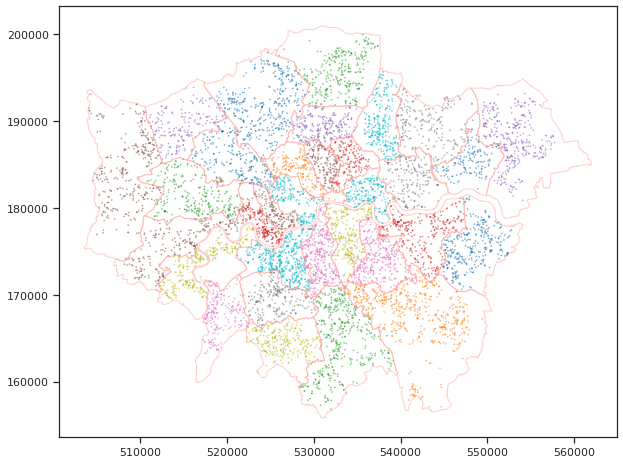

In [77]:
ax = gdf_la.plot(column='NAME', markersize=0.5, alpha=0.5, figsize=(10,8))
boros.plot(ax=ax, edgecolor='r', facecolor='None', alpha=0.5);

(0.0, 30.0)

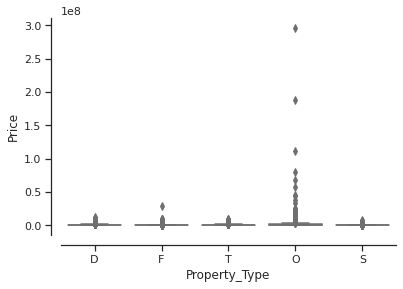

In [74]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(y=df20.Price, x=df20.Property_Type)
sns.despine(offset=10)
ax.set_ylim([0,30])

(0.0, 30.0)

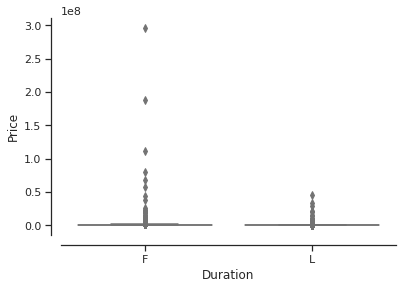

In [82]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(y=df20.Price, x=df20.Duration)
sns.despine(offset=10)
ax.set_ylim([0,30])

(0.0, 30.0)

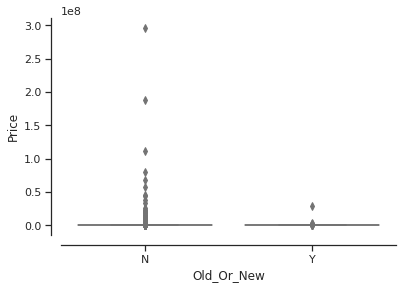

In [84]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(y=df20.Price, x=df20.Old_Or_New)
sns.despine(offset=10)
ax.set_ylim([0,30])

(0.0, 30.0)

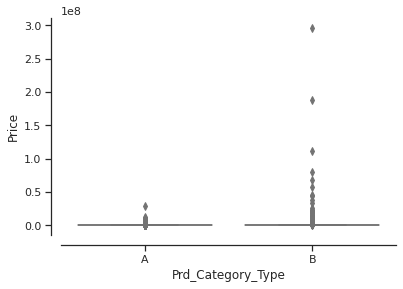

In [86]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(y=df20.Price, x=df20.Prd_Category_Type)
sns.despine(offset=10)
ax.set_ylim([0,30])

(0.0, 30.0)

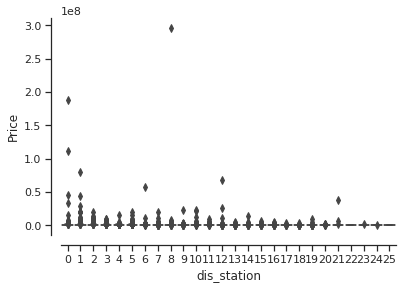

In [92]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(y=df20.Price, x=df20.dis_station)
sns.despine(offset=10)
ax.set_ylim([0,30])

(0.0, 30.0)

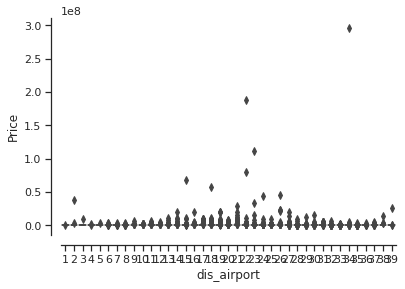

In [93]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(y=df20.Price, x=df20.dis_airport)
sns.despine(offset=10)
ax.set_ylim([0,30])